# Visualization the path of Hurricane Melissa from October 21st to October 31st of 2025

In [113]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import contextily as cx
from io import StringIO

In [114]:
import requests

url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
response = requests.get(url)
response.raise_for_status()

with open("north_america_caribbean.json", "wb") as f:
    f.write(response.content)

print("Download complete: north_america_caribbean.json")

Download complete: north_america_caribbean.json


In [115]:
import json

# Load the full GeoJSON
with open("north_america_caribbean.json", "r") as f:
    data = json.load(f)

# Hurricane Melissa bounding box
bbox = {
    "min_lat": 14.2,   # Southern extent
    "max_lat": 39.0,   # Northern extent
    "min_lon": -78.6,  # Western extent
    "max_lon": -60.5   # Eastern extent
}

# Countries/territories to include for Hurricane Melissa
melissa_countries = [
    "United States of America",
    "Jamaica",
    "Cuba",
    "Haiti",
    "Dominican Republic",
    "Bahamas",
    "Puerto Rico",
    "Turks and Caicos Islands",
    "Cayman Islands",
    "Mexico",  # Eastern coast
    "Barbados",
    "Saint Lucia",
    "Martinique",
    "Dominica",
    "Antigua and Barbuda",
    "Saint Kitts and Nevis",
    "Montserrat",
    "Guadeloupe",
    "Saint Vincent and the Grenadines",
    "Grenada",
    "Trinidad and Tobago",
    "British Virgin Islands",
    "U.S. Virgin Islands",
    "Anguilla",
    "Saint Martin",
    "Sint Maarten"
]

# Filter features
filtered_features = []
for feature in data['features']:
    props = feature.get('properties', {})
    country_name = props.get('name', '')

    if country_name in melissa_countries:
        filtered_features.append(feature)
        print(f"✓ Included: {country_name}")

cropped_data = {
    "type": "FeatureCollection",
    "features": filtered_features,
    "bbox": [bbox['min_lon'], bbox['min_lat'], bbox['max_lon'], bbox['max_lat']]
}

with open("melissa_hurricane_map.json", "w") as f:
    json.dump(cropped_data, f, indent=2)

print(f"\n✓ Cropped map saved: melissa_hurricane_map.json")
print(f"✓ Countries included: {len(filtered_features)}")
print(f"✓ Bounding box: Lat {bbox['min_lat']}° to {bbox['max_lat']}°, Lon {bbox['min_lon']}° to {bbox['max_lon']}°")

✓ Included: Cuba
✓ Included: Dominican Republic
✓ Included: Haiti
✓ Included: Jamaica
✓ Included: Mexico
✓ Included: Puerto Rico
✓ Included: Trinidad and Tobago
✓ Included: United States of America

✓ Cropped map saved: melissa_hurricane_map.json
✓ Countries included: 8
✓ Bounding box: Lat 14.2° to 39.0°, Lon -78.6° to -60.5°


In [116]:
countries = geopandas.read_file("melissa_hurricane_map.json")


<Axes: >

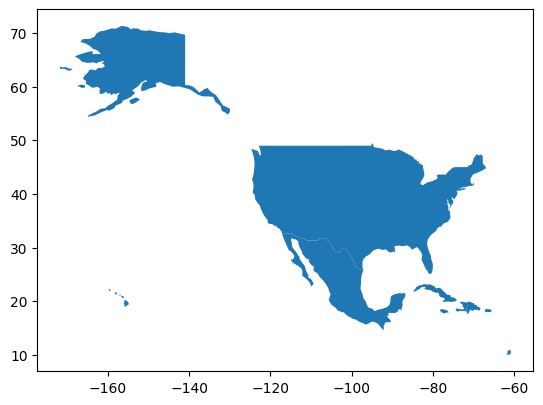

In [117]:
countries.plot()

In [118]:
type(countries)


geopandas.geodataframe.GeoDataFrame

In [119]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [120]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

In [121]:
north_south_america_countries = [
    "Canada", "Mexico", "United States of America", # North America
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela", # South America
    "Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras",
    "Nicaragua", "Panama", # Central America
    "Antigua and Barbuda", "Bahamas", "Barbados", "Cuba", "Dominica",
    "Dominican Republic", "Grenada", "Haiti", "Jamaica", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago" # Caribbean
]

north_south_america = countries[countries['name'].isin(north_south_america_countries)]

display(north_south_america.head())

,id,name,geometry
0,CUB,Cuba,"POLYGON ((-82.26815 23.18861, -81.40446 23.117..."
1,DOM,Dominican Republic,"POLYGON ((-71.71236 19.71446, -71.5873 19.8849..."
2,HTI,Haiti,"POLYGON ((-73.18979 19.91568, -72.57967 19.871..."
3,JAM,Jamaica,"POLYGON ((-77.5696 18.49052, -76.89662 18.4008..."
4,MEX,Mexico,"POLYGON ((-97.14001 25.87, -97.52807 24.99214,..."


In [122]:
url = "https://flhurricane.com/cyclone/stormhistory.php?p=1&year=2025&storm=13"

response = requests.get(url)
html_content = response.text

start = html_content.find('"AdvisoryNumber"')
end = html_content.find("</pre>")
csv_data = html_content[start:end].strip()

Melissa = pd.read_csv(StringIO(csv_data))

print(Melissa.head())

Melissa.to_csv("Melissa_2025.csv", index=False)
print("\n✅ Dataset saved as Melissa_2025.csv")


  AdvisoryNumber              Date   Lat  Long  Wind  Pres  \
0              1  10/21/2025 11:00  14.3  71.7    50  1003   
1             1A  10/21/2025 14:00  14.2  72.6    50  1003   
2              2  10/21/2025 17:00  14.2  73.0    50  1003   
3             2A  10/21/2025 20:00  14.2  73.4    50  1003   
4              3  10/21/2025 23:00  14.2  74.0    50  1003   

                Movement            Type     Name          Received  \
0  W at 14 MPH (280 deg)  Tropical Storm  Melissa  10/21/2025 11:00   
1  W at 14 MPH (280 deg)  Tropical Storm  Melissa  10/21/2025 13:48   
2  W at 15 MPH (275 deg)  Tropical Storm  Melissa  10/21/2025 16:51   
3  W at 15 MPH (275 deg)  Tropical Storm  Melissa  10/21/2025 19:51   
4  W at 13 MPH (270 deg)  Tropical Storm  Melissa  10/21/2025 22:36   

         Forecaster  
0  Cangialosi/bucci  
1  Cangialosi/bucci  
2        Cangialosi  
3             Pasch  
4             Pasch  

✅ Dataset saved as Melissa_2025.csv


# EDA

- Checking the information, data type
- Any missing value
- Statistical data

In [123]:
Melissa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  80 non-null     object 
 1   Date            80 non-null     object 
 2   Lat             80 non-null     float64
 3   Long            80 non-null     float64
 4   Wind            80 non-null     int64  
 5   Pres            80 non-null     int64  
 6   Movement        80 non-null     object 
 7   Type            80 non-null     object 
 8   Name            80 non-null     object 
 9   Received        80 non-null     object 
 10  Forecaster      80 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 7.0+ KB


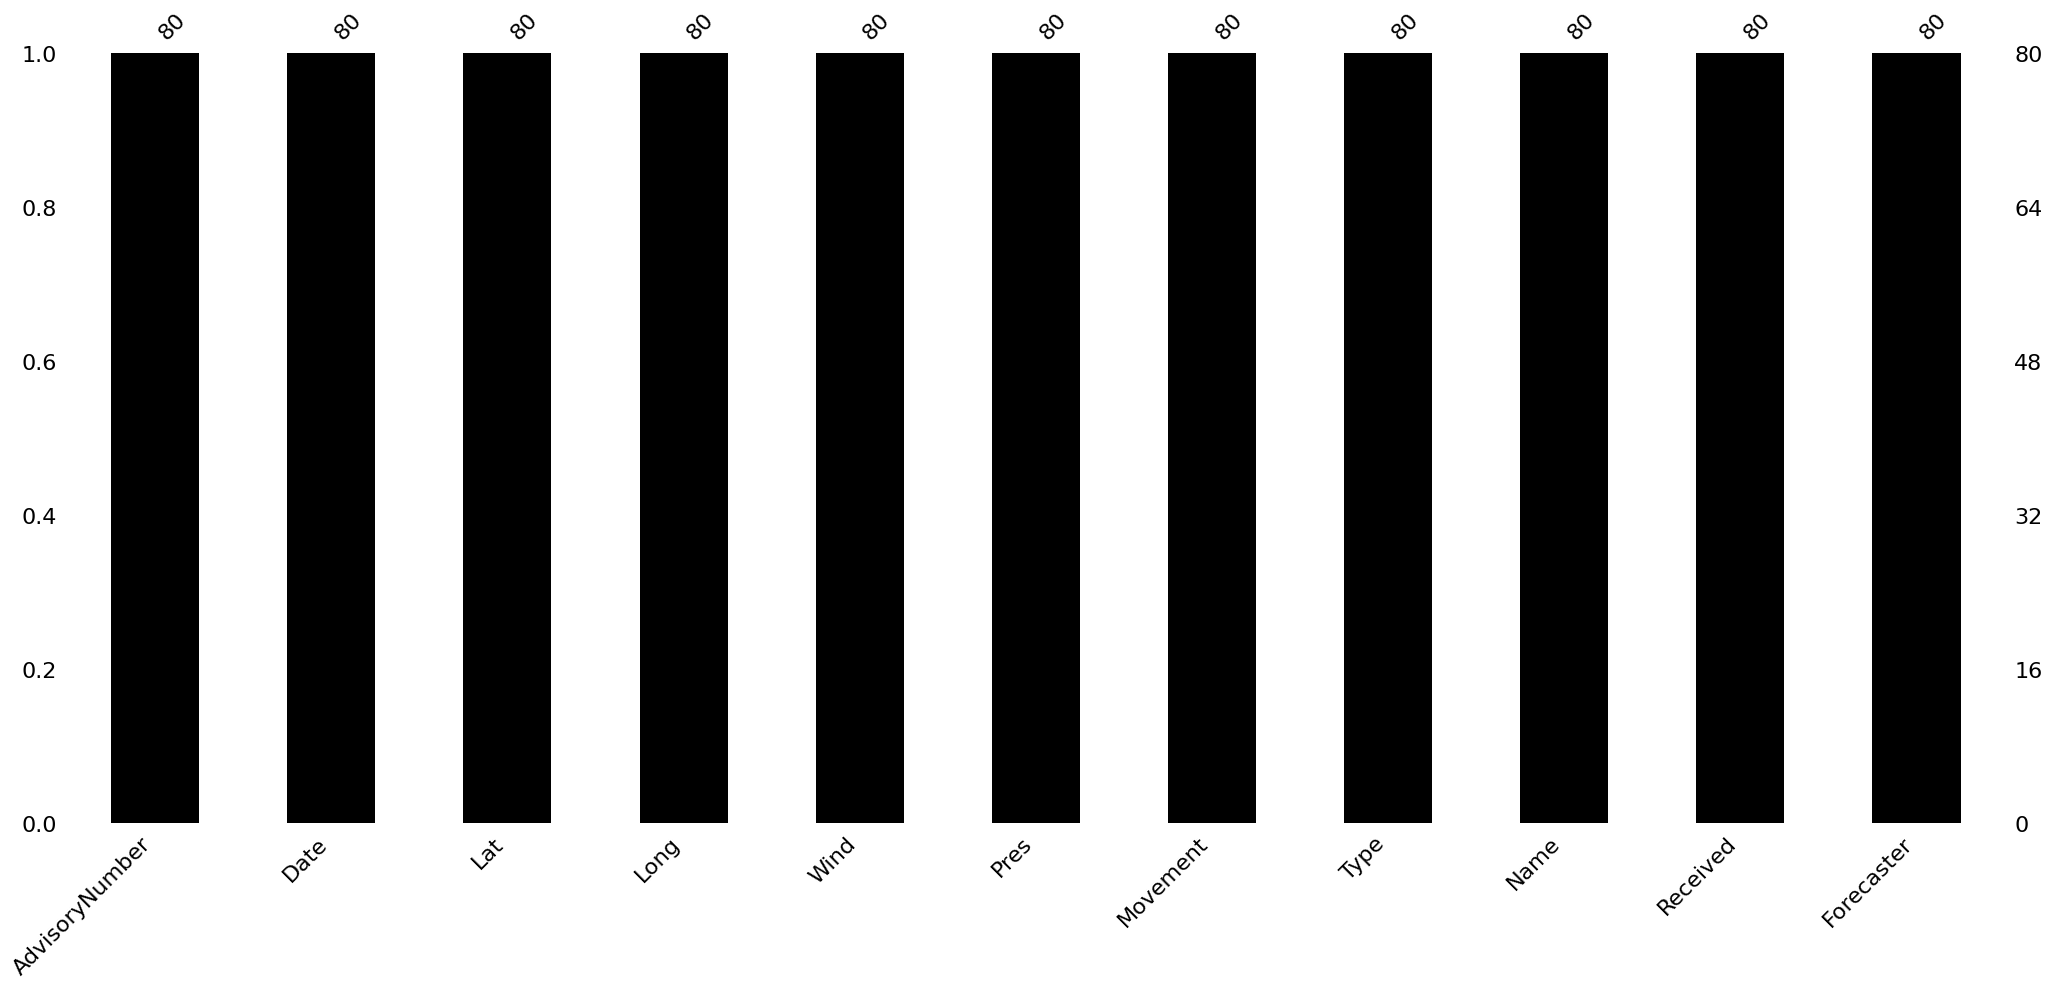

In [124]:
msn.bar(Melissa, color='black');

In [125]:
Melissa.describe()

,Lat,Long,Wind,Pres
count,80.00000,80.000000,80.000000,80.000000
mean,18.60125,74.781250,97.062500,967.650000
std,5.53112,3.166002,44.888707,33.951231
min,14.20000,60.500000,45.000000,892.000000
25%,15.67500,74.000000,50.000000,950.000000
50%,16.40000,75.050000,95.000000,973.000000
75%,18.92500,76.600000,140.000000,1000.250000
max,39.00000,78.600000,185.000000,1003.000000


In [126]:
Melissa = Melissa.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
Melissa.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,10/21/2025 11:00,14.3,71.7,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa
1,10/21/2025 14:00,14.2,72.6,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa
2,10/21/2025 17:00,14.2,73.0,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa
3,10/21/2025 20:00,14.2,73.4,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa
4,10/21/2025 23:00,14.2,74.0,50,1003,W at 13 MPH (270 deg),Tropical Storm,Melissa


In [127]:
Melissa['Long'] = 0 - Melissa['Long']
Melissa.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,10/21/2025 11:00,14.3,-71.7,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa
1,10/21/2025 14:00,14.2,-72.6,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa
2,10/21/2025 17:00,14.2,-73.0,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa
3,10/21/2025 20:00,14.2,-73.4,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa
4,10/21/2025 23:00,14.2,-74.0,50,1003,W at 13 MPH (270 deg),Tropical Storm,Melissa


In [128]:
Melissa['coordinates'] = Melissa[['Long', 'Lat']].values.tolist()
Melissa.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,10/21/2025 11:00,14.3,-71.7,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa,"[-71.7, 14.3]"
1,10/21/2025 14:00,14.2,-72.6,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa,"[-72.6, 14.2]"
2,10/21/2025 17:00,14.2,-73.0,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa,"[-73.0, 14.2]"
3,10/21/2025 20:00,14.2,-73.4,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa,"[-73.4, 14.2]"
4,10/21/2025 23:00,14.2,-74.0,50,1003,W at 13 MPH (270 deg),Tropical Storm,Melissa,"[-74.0, 14.2]"


In [129]:
Melissa['coordinates'] = Melissa['coordinates'].apply(Point)
Melissa.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,10/21/2025 11:00,14.3,-71.7,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa,POINT (-71.7 14.3)
1,10/21/2025 14:00,14.2,-72.6,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa,POINT (-72.6 14.2)
2,10/21/2025 17:00,14.2,-73.0,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa,POINT (-73 14.2)
3,10/21/2025 20:00,14.2,-73.4,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa,POINT (-73.4 14.2)
4,10/21/2025 23:00,14.2,-74.0,50,1003,W at 13 MPH (270 deg),Tropical Storm,Melissa,POINT (-74 14.2)


In [130]:
type(Melissa)

pandas.core.frame.DataFrame

In [131]:
type(Melissa['coordinates'])

pandas.core.series.Series

In [132]:
Melissa = geopandas.GeoDataFrame(Melissa, geometry='coordinates')
Melissa.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,10/21/2025 11:00,14.3,-71.7,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa,POINT (-71.7 14.3)
1,10/21/2025 14:00,14.2,-72.6,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa,POINT (-72.6 14.2)
2,10/21/2025 17:00,14.2,-73.0,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa,POINT (-73 14.2)
3,10/21/2025 20:00,14.2,-73.4,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa,POINT (-73.4 14.2)
4,10/21/2025 23:00,14.2,-74.0,50,1003,W at 13 MPH (270 deg),Tropical Storm,Melissa,POINT (-74 14.2)


In [133]:
type(Melissa)

geopandas.geodataframe.GeoDataFrame

In [134]:
type(Melissa['coordinates'])

geopandas.geoseries.GeoSeries

In [135]:
Melissa[Melissa['Name']=='Melissa']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,10/21/2025 11:00,14.3,-71.7,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa,POINT (-71.7 14.3)
1,10/21/2025 14:00,14.2,-72.6,50,1003,W at 14 MPH (280 deg),Tropical Storm,Melissa,POINT (-72.6 14.2)
2,10/21/2025 17:00,14.2,-73.0,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa,POINT (-73 14.2)
3,10/21/2025 20:00,14.2,-73.4,50,1003,W at 15 MPH (275 deg),Tropical Storm,Melissa,POINT (-73.4 14.2)
4,10/21/2025 23:00,14.2,-74.0,50,1003,W at 13 MPH (270 deg),Tropical Storm,Melissa,POINT (-74 14.2)
...,...,...,...,...,...,...,...,...,...
75,10/30/2025 20:00,31.3,-68.9,105,970,NE at 32 MPH (35 deg),Hurricane,Melissa,POINT (-68.9 31.3)
76,10/30/2025 23:00,32.8,-67.5,100,971,NE at 38 MPH (40 deg),Hurricane,Melissa,POINT (-67.5 32.8)
77,10/31/2025 02:00,34.4,-65.5,90,973,NE at 40 MPH (40 deg),Hurricane,Melissa,POINT (-65.5 34.4)
78,10/31/2025 05:00,35.9,-64.0,90,973,NE at 41 MPH (40 deg),Hurricane,Melissa,POINT (-64 35.9)


In [136]:
Melissa.groupby('Name').Type.count()

,Type
Name,
Melissa,80


In [137]:
print("Mean wind speed of Hurricane Melissa is {} mph and it can go up to {} mph maximum".format(round(Melissa.Wind.mean(),4),
                                                                                         Melissa.Wind.max()))

Mean wind speed of Hurricane Melissa is 97.0625 mph and it can go up to 185 mph maximum


- So the average wind speed of Hurricane Melissa is 97.06 miles per hour (156.22 kilometers per hour), and it can reach a maximum of 185 miles per hour (297.73 kilometers per hour).

- To put this into perspective, based on the Beaufort Wind Scale developed by the U.K. Royal Navy, winds above 73 mph are already classified as hurricane force, capable of causing severe structural damage, uprooting large trees, and generating dangerous flying debris. At 185 mph, Hurricane Melissa would fall within the Category 5 range on the Saffir–Simpson Hurricane Wind Scale, the most extreme classification. Such a storm can cause catastrophic damage, completely destroying framed houses, collapsing roofs and walls, and rendering entire areas uninhabitable for weeks or months.

# VISUALIZATION

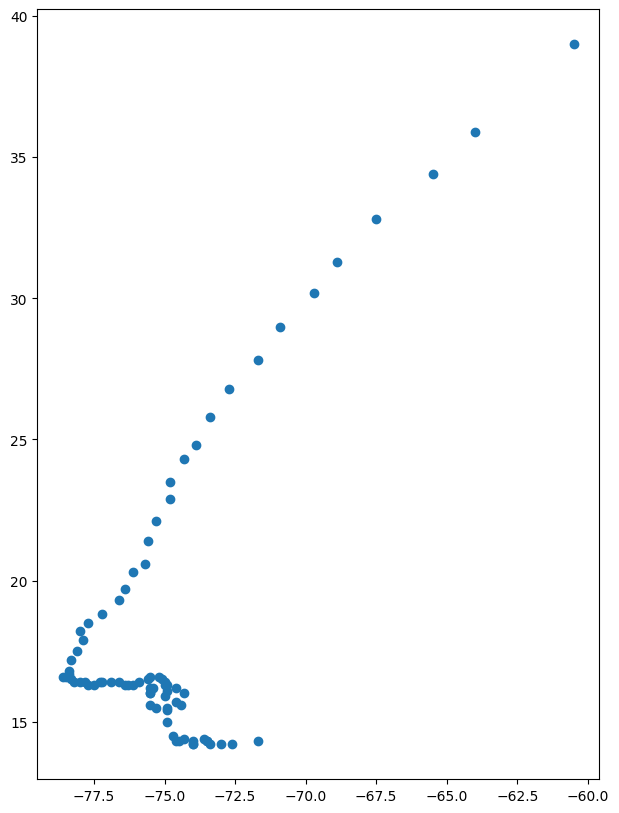

In [138]:
Melissa.plot(figsize=(20,10));


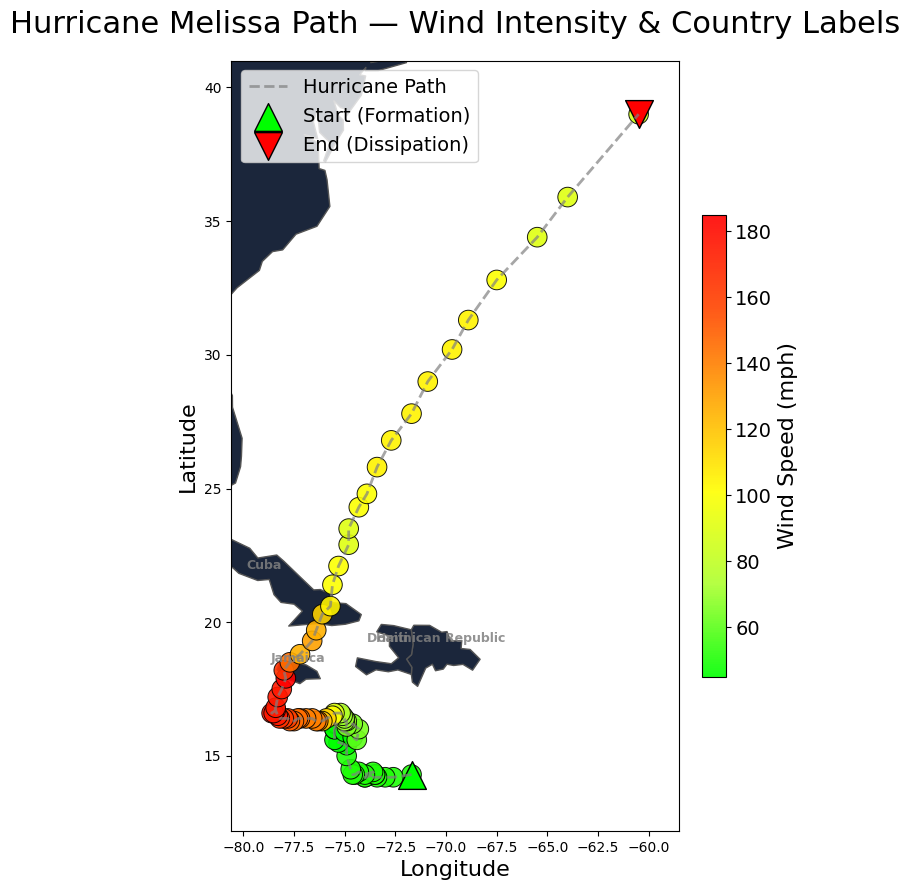

In [139]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors

colors = ["#00FF00", "#ADFF2F", "#FFFF00", "#FFA500", "#FF4500", "#FF0000"]
wind_cmap = mcolors.LinearSegmentedColormap.from_list("wind_intensity", colors)

fig, ax = plt.subplots(figsize=(15, 10))
north_south_america.plot(ax=ax, color="#1b263b", edgecolor="#555")

ax.plot(
    Melissa["Long"], Melissa["Lat"],
    color="gray", linewidth=2, linestyle="--", alpha=0.7, label="Hurricane Path"
)

sc = ax.scatter(
    Melissa["Long"], Melissa["Lat"],
    c=Melissa["Wind"], cmap=wind_cmap,
    s=200, edgecolors="black", linewidths=0.7, alpha=0.9
)

ax.scatter(
    Melissa["Long"].iloc[0], Melissa["Lat"].iloc[0],
    color="lime", s=400, marker="^", edgecolor="black", label="Start (Formation)"
)
ax.scatter(
    Melissa["Long"].iloc[-1], Melissa["Lat"].iloc[-1],
    color="red", s=400, marker="v", edgecolor="black", label="End (Dissipation)"
)

for idx, row in north_south_america.iterrows():
    name = row["name"]
    centroid = row["geometry"].centroid
    x, y = centroid.x, centroid.y

    if lon_min_adj < x < lon_max_adj and lat_min_adj < y < lat_max_adj:
        ax.text(
            x, y + 0.5,
            name,
            fontsize=9, color="grey", ha="center", va="center",
            alpha=0.85, weight="bold", zorder=5
        )

cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.02)
cbar.set_label("Wind Speed (mph)", fontsize=16)
cbar.ax.tick_params(labelsize=14)

ax.set_xlim(lon_min_adj, lon_max_adj)
ax.set_ylim(lat_min_adj, lat_max_adj)
ax.set_title("Hurricane Melissa Path — Wind Intensity & Country Labels", fontsize=22, pad=20)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
ax.legend(fontsize=14, loc="upper left")

plt.show()


In [140]:
import folium
from folium import CircleMarker, PolyLine

m = folium.Map(location=[Melissa["Lat"].mean(), Melissa["Long"].mean()],
               zoom_start=5,
               tiles="Esri.WorldImagery")

# Add hurricane track line
PolyLine(list(zip(Melissa["Lat"], Melissa["Long"])), color="white", weight=3, opacity=0.7).add_to(m)

# Add hurricane points with wind-based color
def wind_to_color(w):
    if w < 60: return "#00FF00"
    elif w < 80: return "#ADFF2F"
    elif w < 100: return "#FFFF00"
    elif w < 130: return "#FFA500"
    elif w < 160: return "#FF4500"
    else: return "#FF0000"

for idx, row in Melissa.iterrows():
    CircleMarker(
        location=[row["Lat"], row["Long"]],
        radius=8,
        color=wind_to_color(row["Wind"]),
        fill=True,
        fill_color=wind_to_color(row["Wind"]),
        fill_opacity=0.9,
        popup=f"Date: {row['Date']}, Wind: {row['Wind']} mph, Pressure: {row['Pres']}"
    ).add_to(m)

m.save("Melissa_Hurricane_Folium.html")
m


In [141]:
from geopy.distance import geodesic

jamaica_coord = (18.1096, -77.2975)  # lat, lon

def distance_to_jamaica(lat, lon):
    point = (lat, lon)
    return geodesic(point, jamaica_coord).kilometers

Melissa["Dist_to_Jamaica_km"] = Melissa.apply(lambda row: distance_to_jamaica(row["Lat"], -row["Long"]), axis=1)

Melissa["Impact_Radius_m"] = Melissa["Wind"] * 1000  # each mph → 1 km radius

Melissa["Affects_Jamaica"] = Melissa["Impact_Radius_m"]/1000 >= Melissa["Dist_to_Jamaica_km"]

Melissa[["Date", "Wind", "Dist_to_Jamaica_km", "Impact_Radius_m", "Affects_Jamaica"]]


,Date,Wind,Dist_to_Jamaica_km,Impact_Radius_m,Affects_Jamaica
0,10/21/2025 11:00,50,15076.875686,50000,False
1,10/21/2025 14:00,50,15151.926200,50000,False
2,10/21/2025 17:00,50,15181.402200,50000,False
3,10/21/2025 20:00,50,15210.658603,50000,False
4,10/21/2025 23:00,50,15254.122683,50000,False
...,...,...,...,...,...
75,10/30/2025 20:00,105,13459.987138,105000,False
76,10/30/2025 23:00,100,13247.513714,100000,False
77,10/31/2025 02:00,90,12992.632658,90000,False
78,10/31/2025 05:00,90,12777.317635,90000,False


In [142]:
import folium
from folium import Circle, PolyLine

def wind_to_color(w):
    if w < 60: return "#00FF00"
    elif w < 80: return "#ADFF2F"
    elif w < 100: return "#FFFF00"
    elif w < 130: return "#FFA500"
    elif w < 160: return "#FF4500"
    else: return "#FF0000"

def wind_to_radius(wind_mph):
    if wind_mph < 60:
        return 20000
    elif wind_mph < 80:
        return 40000
    elif wind_mph < 100:
        return 60000
    elif wind_mph < 130:
        return 80000
    elif wind_mph < 160:
        return 100000
    else:
        return 120000

m = folium.Map(location=[Melissa["Lat"].mean(), Melissa["Long"].mean()],
               zoom_start=5,
               tiles="Esri.WorldImagery")

PolyLine(list(zip(Melissa["Lat"], Melissa["Long"])), color="white", weight=3, opacity=0.7).add_to(m)

for idx, row in Melissa.iterrows():
    radius_m = wind_to_radius(row["Wind"])
    Circle(
        location=[row["Lat"], row["Long"]],
        radius=radius_m,
        color=wind_to_color(row["Wind"]),
        fill=True,
        fill_color=wind_to_color(row["Wind"]),
        fill_opacity=0.2,
        opacity=0.3,
        popup=(
            f"<b>Date:</b> {row['Date']}<br>"
            f"<b>Wind:</b> {row['Wind']} mph<br>"
            f"<b>Pressure:</b> {row['Pres']} mb<br>"
            f"<b>Radius:</b> {radius_m/1000:.1f} km"
        )
    ).add_to(m)

m.save("Melissa_Hurricane_Folium_WithDate.html")
m


In [143]:
!pip install contextily

In [144]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [145]:
Melissa['DateTime'] = pd.to_datetime(Melissa['Date'], errors='coerce')

print(f"Total records: {len(Melissa)}")
print(f"Valid DateTime records: {Melissa['DateTime'].notna().sum()}")

Melissa_anim = Melissa.dropna(subset=['DateTime']).copy()

Melissa_anim = Melissa_anim.sort_values(by='DateTime').reset_index(drop=True)

print(f"Records after sorting: {len(Melissa_anim)}")
print(f"Date range: {Melissa_anim['DateTime'].min()} to {Melissa_anim['DateTime'].max()}")


print("Setting initial CRS and reprojecting data to Web Mercator...")

if Melissa_anim.crs is None:
    print("Setting CRS to EPSG:4326 (WGS 84)...")
    Melissa_anim = Melissa_anim.set_crs(epsg=4326)

Melissa_proj = Melissa_anim.to_crs(epsg=3857)

north_south_america_proj = north_south_america.to_crs(epsg=3857)

print(f"✓ Melissa CRS: {Melissa_proj.crs}")
print(f"✓ Countries CRS: {north_south_america_proj.crs}")


print("Creating animation figure...")

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

minx, miny, maxx, maxy = Melissa_proj.total_bounds
buffer = 800000
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)

print("Adding basemap (this may take a moment)...")
try:
    cx.add_basemap(ax, crs=Melissa_proj.crs, source=cx.providers.Esri.WorldImagery, zoom=5)
except Exception as e:
    print(f"Warning: Could not load basemap: {e}")
    print("Continuing without basemap...")

north_south_america_proj.plot(ax=ax, color='none', edgecolor='white',
                               linewidth=2, alpha=0.8, zorder=2)

line, = ax.plot([], [], color='red', linewidth=4, zorder=3,
                label='Hurricane Path', alpha=0.9)
current_point = ax.scatter([], [], marker='*', s=500, color='yellow',
                           edgecolor='black', linewidth=2.5, zorder=4)

txt_datetime = ax.text(0.02, 0.98, '', transform=ax.transAxes, fontsize=18,
                       color='white', ha='left', va='top', fontweight='bold',
                       bbox=dict(facecolor='black', alpha=0.8, edgecolor='yellow', linewidth=2))

txt_wind = ax.text(0.02, 0.92, '', transform=ax.transAxes, fontsize=16,
                   color='white', ha='left', va='top', fontweight='bold',
                   bbox=dict(facecolor='black', alpha=0.8, edgecolor='yellow', linewidth=2))

txt_pressure = ax.text(0.02, 0.86, '', transform=ax.transAxes, fontsize=16,
                       color='white', ha='left', va='top', fontweight='bold',
                       bbox=dict(facecolor='black', alpha=0.8, edgecolor='yellow', linewidth=2))

txt_location = ax.text(0.02, 0.80, '', transform=ax.transAxes, fontsize=14,
                       color='white', ha='left', va='top',
                       bbox=dict(facecolor='black', alpha=0.8, edgecolor='yellow', linewidth=2))

ax.set_title('Hurricane Melissa (2025) - Animated Track', fontsize=24,
             color='white', fontweight='bold', pad=20,
             bbox=dict(facecolor='darkred', alpha=0.8, edgecolor='white', linewidth=3))
ax.set_xlabel('Longitude', fontsize=16, color='white', fontweight='bold')
ax.set_ylabel('Latitude', fontsize=16, color='white', fontweight='bold')
ax.set_facecolor('#1a1a2e')
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

ax.grid(True, color='white', alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()


def update(frame):
    """Update function called for each frame of the animation"""
    if frame == 0:
        current_data = Melissa_proj.iloc[[0]]
    else:
        current_data = Melissa_proj.iloc[:frame+1]

    if len(current_data) > 0:
        x_coords = [pt.x for pt in current_data.geometry]
        y_coords = [pt.y for pt in current_data.geometry]
        line.set_data(x_coords, y_coords)

        last_point = current_data.iloc[-1]
        last_geom = current_data.geometry.iloc[-1]

        current_point.set_offsets([[last_geom.x, last_geom.y]])

        wind_max = Melissa_proj['Wind'].max()
        wind_normalized = last_point['Wind'] / wind_max if wind_max > 0 else 0
        current_point.set_color(plt.cm.YlOrRd(wind_normalized))

        current_point.set_sizes([last_point['Wind'] * 3 + 100])

        txt_datetime.set_text(f" {last_point['DateTime'].strftime('%B %d, %Y  %H:%M UTC')}")
        txt_wind.set_text(f" Wind Speed: {last_point['Wind']:.0f} mph | Type: {last_point['Type']}")
        txt_pressure.set_text(f" Pressure: {last_point['Pres']:.0f} mb | Movement: {last_point['Movement']}")
        txt_location.set_text(f" Position: {last_point['Lat']:.2f}°N, {abs(last_point['Long']):.2f}°W")

    return line, current_point, txt_datetime, txt_wind, txt_pressure, txt_location


print(f"Creating animation with {len(Melissa_proj)} frames...")
print("This may take a few minutes...")


ani = FuncAnimation(fig, update, frames=len(Melissa_proj),
                    blit=True, interval=200, repeat=False)

plt.close(fig)



print("Saving animation as MP4...")
try:
    ani.save('hurricane_melissa_animation.mp4', writer='ffmpeg', fps=8, dpi=100)
    print("Animation saved as 'hurricane_melissa_animation.mp4'")
except Exception as e:
    print(f" Could not save MP4: {e}")
    print("Trying to save as GIF instead...")
    try:
        ani.save('hurricane_melissa_animation.gif', writer='pillow', fps=5)
        print("Animation saved as 'hurricane_melissa_animation.gif'")
    except Exception as e2:
        print(f" Could not save GIF: {e2}")

print("\n🎬 Animation complete!")
print(f"Total frames: {len(Melissa_proj)}")
print(f"Hurricane duration: {(Melissa_anim['DateTime'].max() - Melissa_anim['DateTime'].min()).days} days")
print(f"Max wind speed: {Melissa_anim['Wind'].max()} mph")
print(f"Min pressure: {Melissa_anim['Pres'].min()} mb")

Total records: 80
Valid DateTime records: 80
Records after sorting: 80
Date range: 2025-10-21 11:00:00 to 2025-10-31 11:00:00
Setting initial CRS and reprojecting data to Web Mercator...
Setting CRS to EPSG:4326 (WGS 84)...
✓ Melissa CRS: EPSG:3857
✓ Countries CRS: EPSG:3857
Creating animation figure...
Adding basemap (this may take a moment)...
Creating animation with 80 frames...
This may take a few minutes...
Saving animation as MP4...
Animation saved as 'hurricane_melissa_animation.mp4'

🎬 Animation complete!
Total frames: 80
Hurricane duration: 10 days
Max wind speed: 185 mph
Min pressure: 892 mb


**Hurricane Melissa - October 2025 Caribbean Disaster**

*Formation and Overview:*
- Hurricane Melissa formed in the central Caribbean Sea on October 27, 2025
- Resulted in at least 49 deaths across the region
- Estimated economic losses: US $48–52 billion
- Entire communities were displaced, with hundreds of thousands losing power, homes, or livelihoods

*Jamaica - First Landfall (October 28):*
- Landfall: Late October 28, 2025
- Intensity: Category 5 hurricane
- Wind speed: 185 mph (295 km/h) sustained winds
- Status: Strongest hurricane to hit Jamaica in history
- Damage: ~90% of structures in towns like Black River were either roofless or destroyed
- Power outages: More than 500,000 residents left without electricity
- Casualties: At least 19 deaths

*Cuba - Second Landfall (October 29):*
- Landfall: Early hours of October 29, 2025
- Intensity: Category 3 hurricane
- Wind speed: ~125 mph
- Evacuations: Approximately 735,000 people evacuated ahead of the storm
- Impact: Widespread damage to roads, agriculture, and communications
- Most affected areas: Santiago de Cuba and Granma provinces
- Casualties: No confirmed death toll publicly released yet
- Aftermath: Communities isolated, infrastructure crippled, full impact still being assessed

*Key Takeaway:*
This disaster underscores the importance of early warnings, resilient infrastructure, and community preparedness to minimize loss and improve recovery from future hurricanes.